In [38]:
import pandas as pd
df = pd.read_csv("data_0104.csv")
df.head()

,정체,기준시간,기준시,기준일,VDS_ID,요일명,지점이정,노드명,도로이정,노선번호,도로명,교통량,평균속도
0,0,1,130,20210104,0500VDE08200,월요일,93.2,여주JC,88.29,500,영동선,22,5.44
1,0,3,330,20210104,0500VDS08200,월요일,93.2,여주IC,94.47,500,영동선,13,6.40
2,0,21,2130,20210104,0500VDS08200,월요일,93.2,여주IC,94.47,500,영동선,24,7.72
3,0,3,345,20210104,0500VDS08200,월요일,93.2,여주IC,94.47,500,영동선,12,7.79
4,0,22,2245,20210104,0500VDS08200,월요일,93.2,여주IC,94.47,500,영동선,11,7.80


In [39]:
df.isnull().sum()

정체        0
기준시간      0
기준시       0
기준일       0
VDS_ID    0
요일명       0
지점이정      0
노드명       0
도로이정      0
노선번호      0
도로명       0
교통량       0
평균속도      0
dtype: int64

In [40]:
df.describe()

,정체,기준시간,기준시,기준일,지점이정,도로이정,노선번호,교통량,평균속도
count,99027.000000,99027.000000,99027.000000,99027.0,99027.000000,99027.000000,99027.000000,99027.000000,99027.000000
mean,0.991255,11.510012,1173.502530,20210104.0,172.906762,172.866345,191.334686,322.315459,97.436496
std,0.093106,6.932438,693.448104,0.0,108.141947,108.311559,236.584643,323.045462,15.898978
min,0.000000,0.000000,0.000000,20210104.0,1.300000,0.200000,10.000000,1.000000,5.440000
25%,1.000000,5.000000,545.000000,20210104.0,84.400000,79.630000,10.000000,89.000000,90.820000
50%,1.000000,12.000000,1200.000000,20210104.0,161.200000,160.010000,10.000000,202.000000,96.540000
75%,1.000000,18.000000,1800.000000,20210104.0,239.770000,234.400000,500.000000,451.000000,102.160000
max,1.000000,23.000000,2345.000000,20210104.0,415.300000,416.050000,500.000000,2277.000000,200.000000


In [41]:
#X : 데이터에서 '정체'열을 떼어낸 학습용, y는 '정체'열만 들어있는 label데이터
#X2 : 후에 feature importance파악 시 사용할 데이터
X = X2 = df.drop('정체', axis = 1)
y = df['정체']
X

,기준시간,기준시,기준일,VDS_ID,요일명,지점이정,노드명,도로이정,노선번호,도로명,교통량,평균속도
0,1,130,20210104,0500VDE08200,월요일,93.2,여주JC,88.29,500,영동선,22,5.44
1,3,330,20210104,0500VDS08200,월요일,93.2,여주IC,94.47,500,영동선,13,6.40
2,21,2130,20210104,0500VDS08200,월요일,93.2,여주IC,94.47,500,영동선,24,7.72
3,3,345,20210104,0500VDS08200,월요일,93.2,여주IC,94.47,500,영동선,12,7.79
4,22,2245,20210104,0500VDS08200,월요일,93.2,여주IC,94.47,500,영동선,11,7.80
...,...,...,...,...,...,...,...,...,...,...,...,...
99022,14,1445,20210104,0010VDE31200,월요일,404.4,서울TG,403.30,10,경부선,987,199.94
99023,20,2045,20210104,0010VDS30100,월요일,389.0,수원신갈IC,392.28,10,경부선,746,199.94
99024,15,1530,20210104,0010VDS29900,월요일,387.0,기흥IC,387.19,10,경부선,1166,199.99
99025,9,900,20210104,0010VDS29500,월요일,380.7,동탄JC,382.10,10,경부선,999,200.00


In [42]:
#0은 정체, 1은 원활
y

0        0
1        0
2        0
3        0
4        0
        ..
99022    1
99023    1
99024    1
99025    1
99026    1
Name: 정체, Length: 99027, dtype: int64

In [43]:
#dummy 변수 설정
X = pd.get_dummies(X, columns = X.columns, drop_first = True)
X.head()

,기준시간_1,기준시간_2,기준시간_3,기준시간_4,기준시간_5,기준시간_6,기준시간_7,기준시간_8,기준시간_9,기준시간_10,...,평균속도_199.74,평균속도_199.76,평균속도_199.81,평균속도_199.82,평균속도_199.83,평균속도_199.89,평균속도_199.9,평균속도_199.94,평균속도_199.99,평균속도_200.0
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
#데이터의 30%를 test용으로 분류
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [45]:
#train set oversampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 11)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print('SMOTE 적용 전', X_train.shape, y_train.shape)
print('SMOTE 적용 후', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 전 레이블 값 분포:\n', pd.Series(y_train).value_counts())
print('SMOTE 적용 후 레이블 값 분포:\n', pd.Series(y_train_over).value_counts())

In [47]:
#평균 = 0, 표준편차 = 1인 표준정규분포로 표준화(데이터 노이즈 감소로 overfit 가능성 낮춤)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_over = sc.fit_transform(X_train_over)
X_test = sc.transform(X_test)

In [48]:
#차원축소
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

X_train_over = pca.fit_transform(X_train_over)
X_test = pca.transform(X_test)

In [49]:
#정확도 점수, 표준 편차 등을 표시하는 함수들
#train인지 test인지에 따라 출력 값이 다름
#매개변수 값이 train이라면 결과값을 낼 때 10번의 교차검증을 모든 cpu를 사용하여 진행

from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def print_score(classifier, X_train_over, y_train_over, X_test, y_test, train = True):
    if train == True:
        print("Training results:\n")
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_train_over, classifier.predict(X_train_over))))
        print("Classification Report:\n{}\n".format(classification_report(y_train_over, classifier.predict(X_train_over))))
        print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_train_over, classifier.predict(X_train_over))))
        
        res = cross_val_score(classifier, X_train_over, y_train_over, cv = 10, n_jobs = -1, scoring = 'accuracy')
        
        print("Average Accuracy:\t{0:.4f}\n".format(res.mean()))
        print("Standard Deviation:\t{0:.4f}\n".format(res.std()))
        
    elif train == False:
        print("Test results:\n")
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_test, classifier.predict(X_test))))
        print("Classification Report:\n{}\n".format(classification_report(y_test, classifier.predict(X_test))))
        print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_test, classifier.predict(X_test))))

In [50]:
#80개의 결정트리 생성, 엔트로피 분리기준
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 80, criterion = 'entropy', random_state = 42)
classifier.fit(X_train_over, y_train_over)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [51]:
print_score(classifier, X_train_over, y_train_over, X_test, y_test, train = True)

Training results:

Accuracy Score: 0.9997

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     68716
           1       1.00      1.00      1.00     68716

    accuracy                           1.00    137432
   macro avg       1.00      1.00      1.00    137432
weighted avg       1.00      1.00      1.00    137432


Confusion Matrix:
[[68704    12]
 [   25 68691]]

Average Accuracy:	0.9400

Standard Deviation:	0.0017



In [52]:
print_score(classifier, X_train_over, y_train_over, X_test, y_test, train = False)

Test results:

Accuracy Score: 0.9048

Classification Report:
              precision    recall  f1-score   support

           0       0.05      0.56      0.09       264
           1       1.00      0.91      0.95     29445

    accuracy                           0.90     29709
   macro avg       0.52      0.73      0.52     29709
weighted avg       0.99      0.90      0.94     29709


Confusion Matrix:
[[  147   117]
 [ 2711 26734]]



In [53]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

lr_probs = classifier.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)

In [57]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

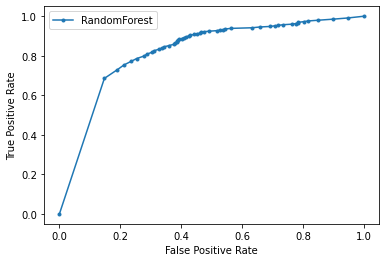

In [60]:
import matplotlib.pyplot as plt
plt.plot(lr_fpr, lr_tpr, marker='.', label='RandomForest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print('Random Forest: ROC AUC = %.3f' % (lr_auc))